<a href="https://colab.research.google.com/github/kush1912/Phocket---ML-Internship/blob/master/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential

from keras.layers import Convolution2D

from keras.layers import MaxPooling2D,AveragePooling2D

from keras.layers import Flatten

from keras.layers import Dense

from keras.layers import Activation

from keras.layers import Dropout

from keras.optimizers import SGD

from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Convolution2D(64,(3,3), border_mode='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Convolution2D(128,(5,5), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 3rd Convolution layer
model.add(Convolution2D(512,(3,3), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 3..., padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`


In [0]:
from zipfile import ZipFile
file_name='TESTING.zip'

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [0]:
from zipfile import ZipFile
file_name='Class.zip'

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [0]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen =  ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Class/TRAINING',
                                                 target_size=(48, 48),
                                                 batch_size=64,
                                                 class_mode='categorical',color_mode='rgb')

test_set = test_datagen.flow_from_directory('Class/VALIDATION',
                                             target_size=(48, 48),
                                             batch_size=64,
                                             class_mode='categorical',color_mode='rgb')

#Save partly trained model# save best weights
checkpointer = ModelCheckpoint(filepath='Flower.h5', verbose=1, save_best_only=True)


model.fit_generator(training_set,
                         steps_per_epoch=3683/100,
                         epochs=50,
                         validation_data=test_set,callbacks=[checkpointer],
                         validation_steps=759/100,verbose=1)

model.summary()

Found 3377 images belonging to 5 classes.
Found 473 images belonging to 5 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/70
37/36 [==============================] - 22s 598ms/step - loss: 1.2915 - acc: 0.4472 - val_loss: 1.6374 - val_acc: 0.4443

Epoch 00001: val_loss improved from inf to 1.63744, saving model to Flower.h5
Epoch 2/70
37/36 [==============================] - 16s 431ms/step - loss: 1.1223 - acc: 0.5416 - val_loss: 1.6326 - val_acc: 0.4287

Epoch 00002: val_loss improved from 1.63744 to 1.63259, saving model to Flower.h5
Epoch 3/70
37/36 [==============================] - 16s 432ms/step - loss: 1.0959 - acc: 0.5614 - val_loss: 1.3465 - val_acc: 0.4735

Epoch 00003: val_loss improved from 1.63259 to 1.34651, saving model to Flower.h5
Epoch 4/70
37/36 [==============================] - 16s 432ms/step - loss: 0.9858 - acc: 0.6047 - val_loss: 1.1841 - val_acc: 0.5679

Epoch 00004: val_loss improved from 1.34651 to 1.18405, saving model to Flower.h5
Epoch 5/7

In [0]:
#trained model evaluation 
test1_set = test_datagen.flow_from_directory('TESTING',
                                             target_size=(48, 48),
                                             batch_size=32,
                                             class_mode ='categorical',color_mode='rgb')

Found 473 images belonging to 5 classes.


In [0]:
model.evaluate_generator(generator=test1_set,steps=32)

[1.1177664948498258, 0.7257425749655997]

In [0]:
generator = test_datagen.flow_from_directory(
        'TESTING',
        target_size=(48, 48),
        batch_size=1,
        class_mode=None,  # only data, no labels
        shuffle=False,color_mode='rgb')  # keep data in same order as labels

probabilities = model.predict_generator(generator, 473)

Found 473 images belonging to 5 classes.


In [0]:
probabilities

array([[2.92563736e-02, 2.03005075e-01, 1.11590505e-01, 3.28034163e-04,
        1.62736289e-02],
       [1.14202499e-04, 6.05583191e-05, 9.13884521e-01, 2.08616257e-07,
        3.31308553e-03],
       [9.73218441e-01, 0.00000000e+00, 1.40070915e-06, 4.47034836e-07,
        1.08030304e-06],
       ...,
       [7.87377357e-05, 2.32738256e-03, 9.01190639e-02, 1.96993351e-05,
        7.76761174e-01],
       [3.33786011e-05, 0.00000000e+00, 5.15580177e-06, 2.98023224e-08,
        9.99661684e-01],
       [2.68220901e-07, 4.79519367e-05, 3.25143337e-05, 2.85327435e-04,
        9.41879034e-01]], dtype=float32)

In [0]:
pba = [i * 10 for i in probabilities]
type(pba)

list

In [0]:
import numpy as np
pp = np.asarray(pba)
type(pp)

numpy.ndarray

In [0]:
po = pp.astype(int)
type(po)

numpy.ndarray

In [0]:
# Funtions to print confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

def confusion_plot_desc(cm):
    labels = ['Daisy','Dandelion','Rose','Sunflower','Tulip']
    df_cm = pd.DataFrame(cm,index=[i for i in labels],columns = [i for i in labels])
    plt.figure(figsize=(10,10))
    #sb.set(font_scale=1.5)
    ax = plt.subplot()
    sb.heatmap(df_cm, annot=True, ax=ax, annot_kws={"size" :16}, cmap="Greens"); #annot=True to annotate cells
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    #ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
   
    
# function to print Description report
def print_Desc_report(y_true, y_pred):
    print('Testing Accuracy Of Description: {}'.format(accuracy_score(y_true, y_pred)))
    print('Testing F1 score Of Description: {}'.format(f1_score(y_true, y_pred, average='weighted')))
    print(metrics.classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    confusion_plot_desc(cm)
    print()

    


In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = np.array([0] * 88 + [1] * 110 + [2] * 88 + [3] * 77 + [4] * 110)
y = [0,1,2,3,4]
y_pred =  po.argmax(axis = 1)
#print(y_pred)
#for i in range(0,len(y_pred)):
 # if(y_pred[i] > 0.5):
  #   y_pred[i] = 1
#print(y_pred)
cm = confusion_matrix(y_true, y_pred)
#print(cm)

Testing Accuracy Of Description: 0.7061310782241015
Testing F1 score Of Description: 0.7055202397090501
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        88
           1       0.92      0.51      0.65       110
           2       0.67      0.77      0.72        88
           3       0.82      0.83      0.83        77
           4       0.82      0.60      0.69       110

    accuracy                           0.71       473
   macro avg       0.75      0.72      0.71       473
weighted avg       0.76      0.71      0.71       473




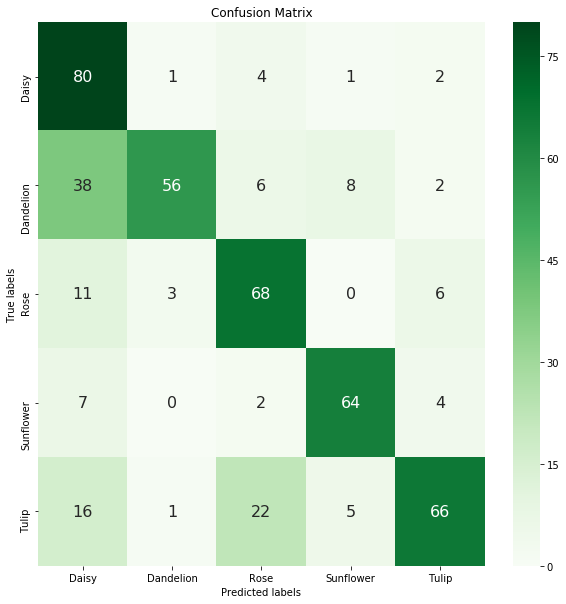

In [0]:
print_Desc_report(y_true, y_pred)